# Pandas

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

In [1]:
import pandas as pd
import numpy as np
#магия для отображения графиков в тетрадке
%matplotlib inline 

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

Для начала рассмотрим простые примеры создания таких объектов и возможных операций над ними.

### Series

** Создание объекта Series из 5 элементов, индексированных буквами:**

In [2]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 
salaries                                                               

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64

In [3]:
# тут можно наблюдать "консистентность" между библиотеками numpy и pandas
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [4]:
salaries.Andrew == salaries['Andrew']

np.True_

In [5]:
salaries['Andrew'], salaries.Andrew

(np.int64(400), np.int64(400))

**Series поддерживает пропуски в данных.**

In [6]:
salaries['Carl'] = np.nan
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [7]:
salaries['Carl']

np.float64(nan)

In [8]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [9]:
salaries.fillna(salaries.median(), inplace=True)

In [10]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

**Объекты Series похожи на ndarray и могут быть переданы в качестве аргументов большинству функций из Numpy.**

In [11]:
print('Второй элемент серии', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print(len(salaries[salaries > 0]), 'Положительных значение\n')

Второй элемент серии 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

5 Положительных значение



/tmp/ipykernel_2108007/887465593.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Второй элемент серии', salaries[1], '\n')


In [12]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

Можно передавать в функции numpy

In [13]:
print(np.exp(salaries))

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64


### DataFrame

### Создание и изменение

**Альтернативным способом является создание DataFrame из словаря numpy массивов или списков.**

In [14]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,c,False
3,0.370292,d,True
4,0.597847,e,True


In [15]:
type(df2)

pandas.core.frame.DataFrame

**Обращение к элементам (или целым кускам фрейма):**

In [16]:
print('Элемент на 3 позиции в столбце 3 = ', df2.at[3, 'B'], '\n')
print(df2.loc[1:4, 'A':'C'])

Элемент на 3 позиции в столбце 3 =  d 

          A  B      C
1  0.432065  b  False
2  0.450958  c  False
3  0.370292  d   True
4  0.597847  e   True


**Изменение элементов и добавление новых:**

In [17]:
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,f,False
3,0.370292,d,True
4,0.597847,e,True


In [18]:
df2.loc[4]

A    0.597847
B           e
C        True
Name: 4, dtype: object

In [19]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,f,False
3,0.370292,d,True
4,0.597847,e,True
5,3.141500,c,False


In [20]:
df1 = df2.copy()
df1

,A,B,C
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,f,False
3,0.370292,d,True
4,0.597847,e,True
5,3.141500,c,False


In [21]:
df1.columns = ['A', 'B', 'C']
df3 = pd.concat([df1, df2])
df3

,A,B,C
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,f,False
3,0.370292,d,True
4,0.597847,e,True
5,3.141500,c,False
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,f,False
3,0.370292,d,True


#### Обработка пропущенных значений

In [22]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

,A,B,C
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,f,False
3,0.370292,d,True
4,0.597847,e,True
5,3.141500,c,False
o2,NaN,NaN,NaN
o4,NaN,NaN,NaN


**Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False):**

In [23]:
pd.isnull(df1)

,A,B,C
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
o2,True,True,True
o4,True,True,True


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [24]:
df1

,A,B,C
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,f,False
3,0.370292,d,True
4,0.597847,e,True
5,3.141500,c,False
o2,NaN,NaN,NaN
o4,NaN,NaN,NaN


In [25]:
df1.dropna(axis=0)

,A,B,C
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,f,False
3,0.370292,d,True
4,0.597847,e,True
5,3.141500,c,False


In [26]:
df1

,A,B,C
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,f,False
3,0.370292,d,True
4,0.597847,e,True
5,3.141500,c,False
o2,NaN,NaN,NaN
o4,NaN,NaN,NaN


In [27]:
df1['D'] = df1.shape[0]*[np.nan]

In [28]:
df1

,A,B,C,D
0,0.820915,a,False,NaN
1,0.432065,b,False,NaN
2,0.450958,f,False,NaN
3,0.370292,d,True,NaN
4,0.597847,e,True,NaN
5,3.141500,c,False,NaN
o2,NaN,NaN,NaN,NaN
o4,NaN,NaN,NaN,NaN


In [29]:
df1.dropna(how='all', axis=1)

,A,B,C
0,0.820915,a,False
1,0.432065,b,False
2,0.450958,f,False
3,0.370292,d,True
4,0.597847,e,True
5,3.141500,c,False
o2,NaN,NaN,NaN
o4,NaN,NaN,NaN


**Пропуски можно заменить каким-то значением.**

In [30]:
df1.fillna(0)

,A,B,C,D
0,0.820915,a,False,0.0
1,0.432065,b,False,0.0
2,0.450958,f,False,0.0
3,0.370292,d,True,0.0
4,0.597847,e,True,0.0
5,3.141500,c,False,0.0
o2,0.000000,0,0,0.0
o4,0.000000,0,0,0.0


## Пример первичного анализа данных с Pandas

In [31]:
import pandas as pd

Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

Скачаем данные:

In [32]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv

--2026-01-28 18:40:04--  https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.04s   

2026-01-28 18:40:04 (1.60 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [33]:
pass_data = pd.read_csv('titanic.csv')

Данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [34]:
pass_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [35]:
pass_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [36]:
pass_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Посмотрим на признаки:

In [37]:
pass_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat - Lifeboat (if survived)

body - Body number (if did not survive and body was recovered)

В этом ноутбуке мы думали, что названия столбцов начинаются с маленькой буквы, а в данных первая буква заглавная, придется исправить:

In [38]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
pass_data = pass_data.rename(str.lower, axis="columns")

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [40]:
pass_data[2:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [41]:
pass_data.iloc[1:5, 1:3]

,survived,pclass
1,1,1
2,1,3
3,1,1
4,0,3


In [42]:
pass_data.loc[1:5, "survived":"name"]

,survived,pclass,name
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,3,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,"Allen, Mr. William Henry"
5,0,3,"Moran, Mr. James"


In [43]:
pass_data['name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [44]:
pass_data[['name', 'sex', 'pclass']].head()

,name,sex,pclass
0,"Braund, Mr. Owen Harris",male,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1
2,"Heikkinen, Miss. Laina",female,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1
4,"Allen, Mr. William Henry",male,3


Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [45]:
pass_data[pass_data['sex'] == 'female'].head() # женщины на борту

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [46]:
pass_data.shape

(891, 12)

Кроме того, для заданного признака можно построить гистограмму:

<Axes: >

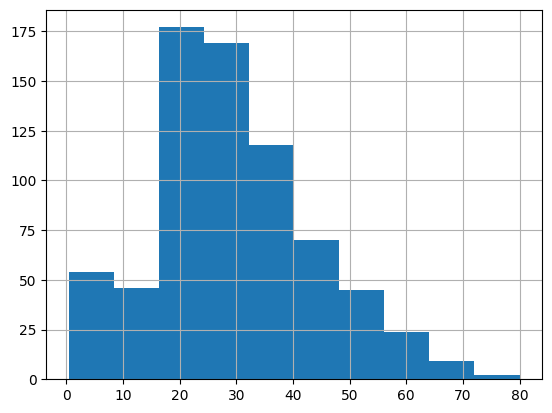

In [47]:
pass_data.age.hist(bins = 10)

## Редактирование DataFrame

* Переименование признаков

In [48]:
pass_data.rename(columns={'sex': 'Sex'}, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Удаление признака

In [51]:
pass_data.drop('ticket', axis=1).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [52]:
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
pass_data.drop('ticket', axis=1, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


* Работа с пропущенными данными

In [55]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   fare         891 non-null    float64
 9   cabin        204 non-null    object 
 10  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Методы isnull() и notnull() позволяют получить бинарный массив, отражающий отсутствие или наличие данных для каждого из объектов соответственно:

In [56]:
pass_data['cabin'].isnull().head()

0     True
1    False
2     True
3    False
4     True
Name: cabin, dtype: bool

In [57]:
pass_data[pass_data['cabin'].notnull()].head() # пассажиры с известным номером шлюпки эвакуации

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,C103,S


* Сортировка объектов/признаков

In [58]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,fare,cabin,embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,0.0,B94,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,0.0,NaN,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,0.0,A36,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,0.0,B102,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,0.0,NaN,S


In [59]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,fare,cabin,embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,C23 C25 C27,S


## Группировка данных

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [60]:
pass_data.groupby('Sex') # разбиение всех объектов на 2 группы по полу

In [61]:
pass_data.groupby('Sex')['pclass'].value_counts()

Sex     pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: count, dtype: int64

In [62]:
pass_data.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [63]:
pass_data.groupby('Sex')['age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    27.915709
male      30.726645
Name: age, dtype: float64

Как известно, в первую очередь спасали женщин и детей в порядке повышения номера класса, в связи с этим доля выживших женщин, вероятно, будет выше, чем доля выживших мужчин. Проверим:

In [64]:
pass_data.groupby('Sex')['survived'].mean()

Sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Аналогично для пассажиров различных классов:

In [65]:
pass_data.groupby('pclass')[['survived', 'age']].mean()

,survived,age
pclass,,
1,0.629630,38.233441
2,0.472826,29.877630
3,0.242363,25.140620


Рассмотренные выше статистические данные могут быть рассмотрены и в виде стандартного DataFrame:

In [66]:
pass_data.groupby('Sex', as_index=False)['survived'].mean()

,Sex,survived
0,female,0.742038
1,male,0.188908


## Сохранение данных

Также данные можно сохранить в файл:

In [67]:
pass_data.to_csv('titanic_2.csv', index=False)